# **SCDT for Parameter Estimation of 1D Signals**
Authors : Sumati Thareja, Gustavo Rohde, Rocio Diaz-Martin, Ivan Medri, Akram Aldroubi


  



## Introduction:
The goal in this notebook is to show how the Signal Cumulative Distribution Transform (SCDT) can be implemented to recover parameters $p=(p_0,\dots,p_n)$ of a function $g_\textbf{p}(t)$ that produces a signal via the generative model
$$s_{g_\textbf{p}}(t)=g_{\textbf{p}}^\prime(t)s(g_{\textbf{p}}(t)).$$
That is, by knowing the signals $s(t)$, and $s_{g_\textbf{p}}(t)$ (or a measured signal $r(t)\sim s_{g_\textbf{p}}(t)$) we will recover the parameters $\textbf{p}$ attached to $g_\textbf{p}(t)$. 

The procedure will be to apply the SCDT and then solve a minimization problem in the transform domain. A Wasserstein-type metric for measuring the agreement between two signals is involved in this regard.

## Method:

Let $\widehat{s}$ and $\widehat{r}$ be the SCDT of the original signal $s(t)$ and the received signal $r(t)$, respectively. The cost function in the transform space is given by 
$$ \|g_{\textbf{p}} \circ \widehat{r} -  \widehat{s} \|_2$$
In fact, it can be shown that that cost funtion correspond to the Wasserstein distance between between $s(t)$ and $(g_{\textbf{p}}^{-1})^\prime(t)r(g_{\textbf{p}}^{-1}(t))$.


Throughout this notebook, the function $g_\textbf{p}(t)$ of interest is a polynomial (i.e. $g_\textbf{p}(t)=\sum_{k=0}^n p_kt^k$). However, any other linear models such as 
$g_\textbf{p}(t)=\sum_{k=0}^n p_k\phi_k(t)$, where the basic functions $\{\phi_k(t)\}$ are known, can also be used with this technique.

If $g_\textbf{p}(t)=\sum_{k=0}^n p_k t^k$ then  $$g_\textbf{p} \circ \widehat{r} = \displaystyle \sum_{k=0}^{n} p_k (\widehat{r})^k.$$  Therefore, after discretizing the given signals $s(t)$ and $r(t)$  and taking the SCDT we will solve the following 
linear least squares problem in SCDT-domain:

\begin{align*}
\displaystyle argmin_{\textbf{p}=(p_0,\dots,p_n)}\left\|
            \begin{bmatrix} | & | & & |\\ 1 & \widehat{r} &\cdots & \widehat{r}^n \\ | & | & & | \end{bmatrix}   \begin{bmatrix} |\\ p \\ | \end{bmatrix} - \begin{bmatrix} |\\   \widehat{s} \\ | \end{bmatrix} \right\|_2
\end{align*}


In this notebook, the example signal $s(t)$ is the Gabor function, i.e.
$$s(t)=\cos(40\pi(t-0.5))e^{-120(t-0.5)^2}$$

<!-- The SCDT of a signal $s(t)$ is given as

$$ \widehat{s} = \left((s^{+})^\star, \|s^+\|_1, (s^{-})^\star, \|s^-\|_1\right),$$

where $s^+ = \frac{{s} + |{s}|}{2}$,  ${s}^- = \frac{{s} - |{s}|}{2}$, and $(s^{\pm})^\star$ denote the CDT of $s^\pm(t)$ after normalization. -->

Importe necessary packages

In [24]:
import numpy as np
from numpy import interp
import math
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy import signal
# To use the SCDT first install the PyTransKit package using:
#!pip install pytranskit
from pytranskit.optrans.continuous.scdt import SCDT

# import sys
# sys.path.append('../')
# from pytranskit.optrans.continuous import SCDT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Example

####Reference Signal $s_0(t)$

It is needed for defining the SCDT. We will consider a uniform distribution.

In [25]:
# Number of sample points
N = 300 

# Domain of the reference
t0 = np.linspace(0,1,N)

# Uniform distribution
s0 = np.ones(N)
s0 = s0/s0.sum()

# Initilize SCDT class
scdt = SCDT(reference=s0)  

# # Plot
# plt.plot(t0,s0)
# plt.show()

####Test Signal $s(t)$

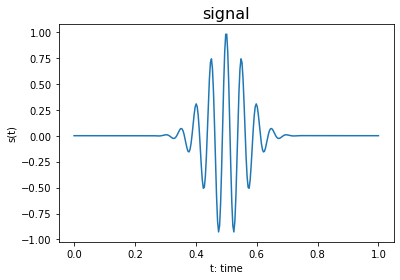

In [26]:
# Domain of the target signal
t = np.linspace(0,1,N) 

def signal_gabor(t):
    w = 10
    s = (np.cos(4*math.pi*w*(t-0.5)) * np.exp(-120*((t-0.5)**2)))
    return s

s = signal_gabor(t)

# Plot s
plt.plot(t, s)
plt.title("signal",
          fontsize=16, color='black')
plt.xlabel('t: time')
plt.ylabel('s(t)')
plt.show()

Compose the test signal $s(t)$ with various composition functions $g(t)$ producing a signal via the generative model
$$s_g(t)=g'(t)s(g(t))$$

Here, $g(t)$ is linear, quadratic and cubic polynomial respectively.

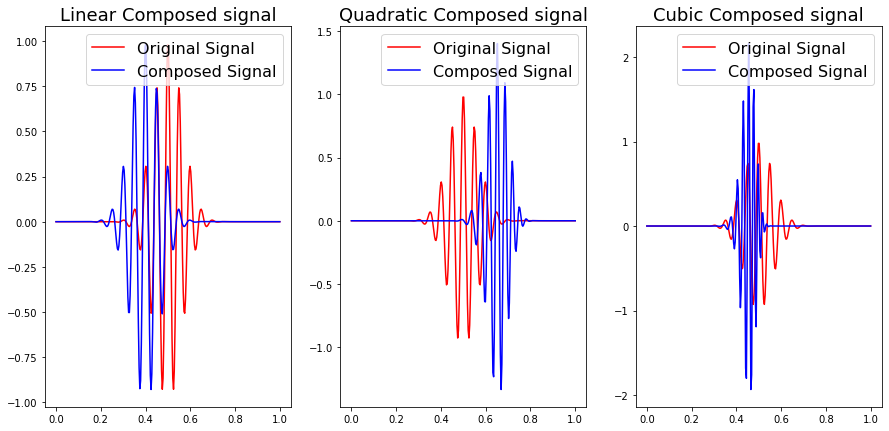

In [27]:
# Composition with a linear polynomial
# Parameters of a linear polynomial
b_l = 1
c_l = 0.1

g_l =  b_l*(t) + c_l
g_prime_l =  b_l

# Composition of the original signal
s_g_l = g_prime_l * signal_gabor(g_l)




# Composition with a quadratic polynomial
# Parameters of a quadratic polynomial
a_q = 1 
b_q = 0.1 
c_q = 0.01 

g_q = a_q*(t)**2 + b_q*(t) + c_q
g_prime_q = 2*a_q*(t) + b_q

# Composition of the original signal
s_g_q = g_prime_q * signal_gabor(g_q) 




# Composition with a cubic polynomial
# Parameters of a cubic polynomial
a_c = 2 
b_c = 1 
c_c = 0.01 
d_c = 0.1 

g_c = a_c*(t)**3 + b_c*(t)**2 + c_c*(t) + d_c
g_prime_c = 3*a_c*(t)**2 + 2*b_c*t + c_c

# Composition of the original signal
s_g_c = g_prime_c * signal_gabor(g_c)




# Plot s and sg in the three cases
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,7))
ax[0].plot(t,s,'r-')
ax[0].plot(t, s_g_l, 'b-')
ax[0].legend(['Original Signal','Composed Signal'],fontsize=16)
ax[0].set_title('Linear Composed signal',fontsize=18)
ax[1].plot(t,s,'r-')
ax[1].plot(t, s_g_q, 'b-')
ax[1].set_title('Quadratic Composed signal',fontsize=18)
ax[1].legend(['Original Signal','Composed Signal'],fontsize=16)
ax[2].plot(t,s,'r-')
ax[2].plot(t, s_g_c, 'b-')
ax[2].set_title('Cubic Composed signal',fontsize=18)
ax[2].legend(['Original Signal','Composed Signal'],fontsize=16)

plt.show()

Calculate the SCDT of $s(t)$ and $s_g(t)$

In [28]:
# Calculate theSCDT of the original signal s
spos, sneg, smasspos, smassneg = scdt.stransform(s)

# Concatenate all the transform data of s into one vector
# spos_mass = np.array([smasspos])
# sneg_mass = np.array([smassneg])
# spos_final = np.concatenate((spos,spos_mass),axis=0)
# sneg_final = np.concatenate((sneg,sneg_mass),axis=0)
# s_final = np.concatenate((spos_final,sneg_final),axis=0)
s_final = np.concatenate((spos,sneg),axis=0)


# Calculate the SCDT of the composed signal (linear)
s_gposl, s_gnegl, s_gmassposl, s_gmassnegl = scdt.stransform(s_g_l)

# Concatenate all the transform data of s_g_l into one vector
# sgpos_massl = np.array([s_gmassposl])
# sgneg_massl = np.array([s_gmassnegl])
# sgpos_finall = np.concatenate((s_gposl,sgpos_massl),axis=0)
# sgneg_finall = np.concatenate((s_gnegl,sgneg_massl),axis=0)
# sg_final_l = np.concatenate((sgpos_finall,sgneg_finall),axis=0)
sg_final_l = np.concatenate((s_gposl,s_gnegl),axis=0)

# Calculate the SCDT of the composed signal (quadratic)
s_gposq, s_gnegq, s_gmassposq, s_gmassnegq = scdt.stransform(s_g_q)

# Concatenate all the transform data of s_g_q into one vector
# sgpos_massq = np.array([s_gmassposq])
# sgneg_massq = np.array([s_gmassnegq])
# sgpos_finalq = np.concatenate((s_gposq,sgpos_massq),axis=0)
# sgneg_finalq = np.concatenate((s_gnegq,sgneg_massq),axis=0)
# sg_final_q = np.concatenate((sgpos_finalq,sgneg_finalq),axis=0)
sg_final_q = np.concatenate((s_gposq,s_gnegq),axis=0)

# Calculate the SCDT of the composed signal (cubic)
s_gposc, s_gnegc, s_gmassposc, s_gmassnegc = scdt.stransform(s_g_c)

# Concatenate all the transform data of s_g_c into one vector
# sgpos_massc = np.array([s_gmassposc])
# sgneg_massc = np.array([s_gmassnegc])
# sgpos_finalc = np.concatenate((s_gposc,sgpos_massc),axis=0)
# sgneg_finalc = np.concatenate((s_gnegc,sgneg_massc),axis=0)
# sg_final_c = np.concatenate((sgpos_finalc,sgneg_finalc),axis=0)
sg_final_c = np.concatenate((s_gposc,s_gnegc),axis=0)

Calculate the parameters in the transform space

In [29]:
# Calculate linear parameters using the transform (SCDT) and aolving a 
# least
B_l = np.array([[1,i] for i in s_gposl])
estimates_l = np.linalg.solve(np.matmul(np.transpose(B_l),B_l), np.matmul(np.transpose(B_l),np.transpose(spos)))

#Calculate quadratic parameters using the transform
B_q = np.array([[1,i,i**2] for i in s_gposq])
estimates_q = np.linalg.solve(np.matmul(np.transpose(B_q),B_q), np.matmul(np.transpose(B_q),np.transpose(spos)))

#Calculating cubic parameters using the transform
B_c = np.array([[1,i,i**2,i**3] for i in s_gposc])
estimates_c = np.linalg.solve(np.matmul(np.transpose(B_c),B_c), np.matmul(np.transpose(B_c),np.transpose(spos)))


Plot the estimation of the polynomial $g(t)$ and the original one 

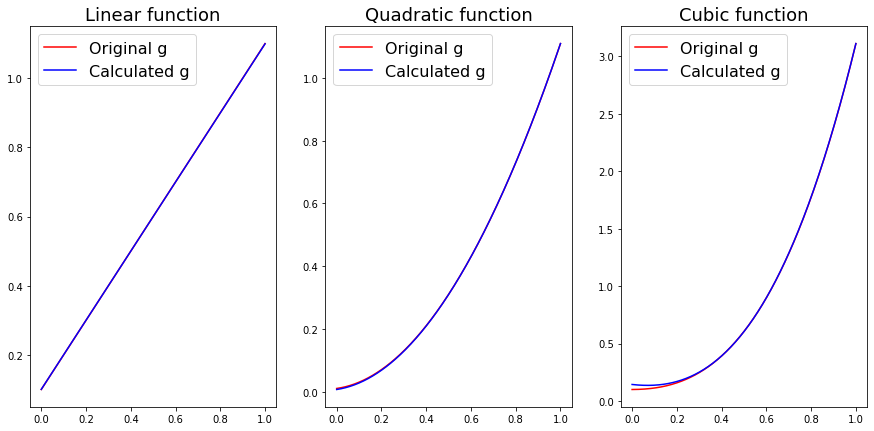

In [30]:
#Evaluating the polynomials using calculated parameters

#Cubic
g_cal_c = estimates_c[3]*(t)**3 + estimates_c[2]*(t)**2 + estimates_c[1]*(t) + estimates_c[0]
#Quadratic
g_cal_q = estimates_q[2]*(t)**2 + estimates_q[1]*(t) + estimates_q[0]
#Linear
g_cal_l = estimates_l[1]*(t) + estimates_l[0]


# Plot the actual composition function with the calculated composition function
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,7))
ax[0].plot(t,g_l,'r-')
ax[0].plot(t, g_cal_l, 'b-')
ax[0].legend(['Original g','Calculated g'],fontsize=16)
ax[0].set_title('Linear function',fontsize=18)

ax[1].plot(t,g_q,'r-')
ax[1].plot(t, g_cal_q, 'b-')
ax[1].set_title('Quadratic function',fontsize=18)
ax[1].legend(['Original g','Calculated g'],fontsize=16)

ax[2].plot(t,g_c,'r-')
ax[2].plot(t, g_cal_c, 'b-')
ax[2].set_title('Cubic function',fontsize=18)
ax[2].legend(['Original g','Calculated g'],fontsize=16)

plt.show()